<a href="https://colab.research.google.com/github/AdityaRam1607/Smart-Pricing-for-Homestays-A-Comprehensive-Data-Analysis-and-Prediction-Approach/blob/main/home_stays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTS NEEDED

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# MOUNTING GOOGLE COOLAB WITH DRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# GIVING PATH OF MY FILE CSV

df = pd.read_csv('Homestays Data.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [ ]:
import datetime
import re

# **1. Feature Engineering:**  Host tenure

In [ ]:
# Fill missing values in 'host_since' with values from 'first_review' or 'last_review'
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])
df['host_since'] = df['host_since'].fillna(df['first_review']).fillna(df['last_review'])

# Fill remaining missing values with 0
df['host_since'] = df['host_since'].fillna(pd.to_datetime(0))


# Convert 'host_since' column to datetime
df['host_since'] = pd.to_datetime(df['host_since'])

# Calculate host tenure in years
current_date = datetime.datetime.now()
df['Host_Tenure'] = (current_date - df['host_since']).dt.days / 365

Amenities Count:

In [ ]:
# Convert 'amenities' column to list of amenities
df['amenities'] = df['amenities'].apply(lambda x: x.strip('[]').replace("'", "").split(','))

# Count the number of amenities
df['Amenities_Count'] = df['amenities'].apply(len)


In [ ]:
# print Amenities_Count

print(df['Amenities_Count'])


0         9
1        15
2        19
3        15
4        12
         ..
74106     1
74107    16
74108    31
74109    15
74110    18
Name: Amenities_Count, Length: 74111, dtype: int64


Days Since Last Review:



In [ ]:
# Convert 'last_review' column to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# Calculate days since last review
df['Days_Since_Last_Review'] = (current_date - df['last_review']).dt.days


# 2. Data Analysis (EDA):

<ipython-input-11-ed47e0243791>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='log_price', data=grouped_data, palette='Set2')


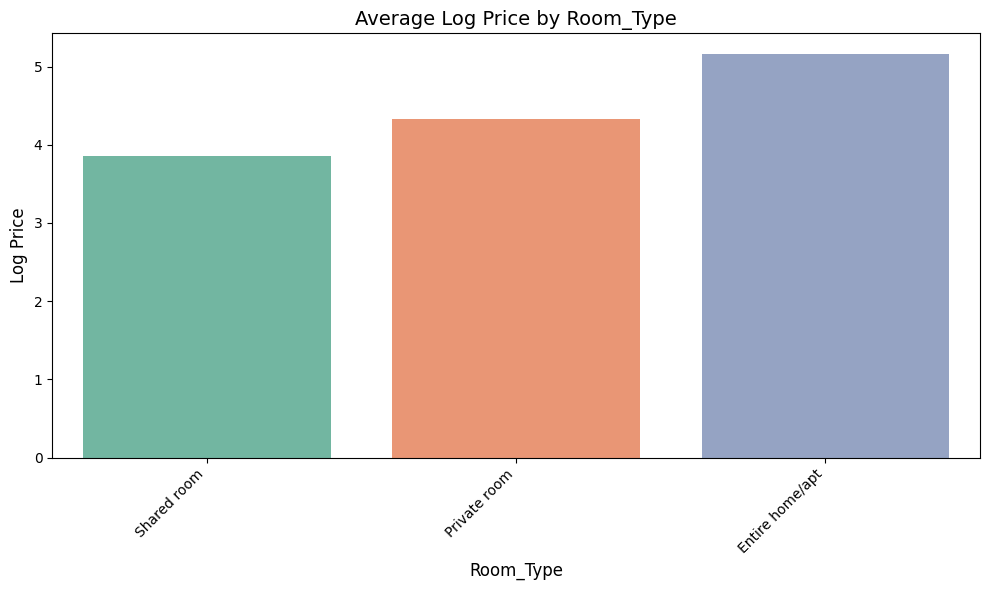

<ipython-input-11-ed47e0243791>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='log_price', data=grouped_data, palette='Set2')


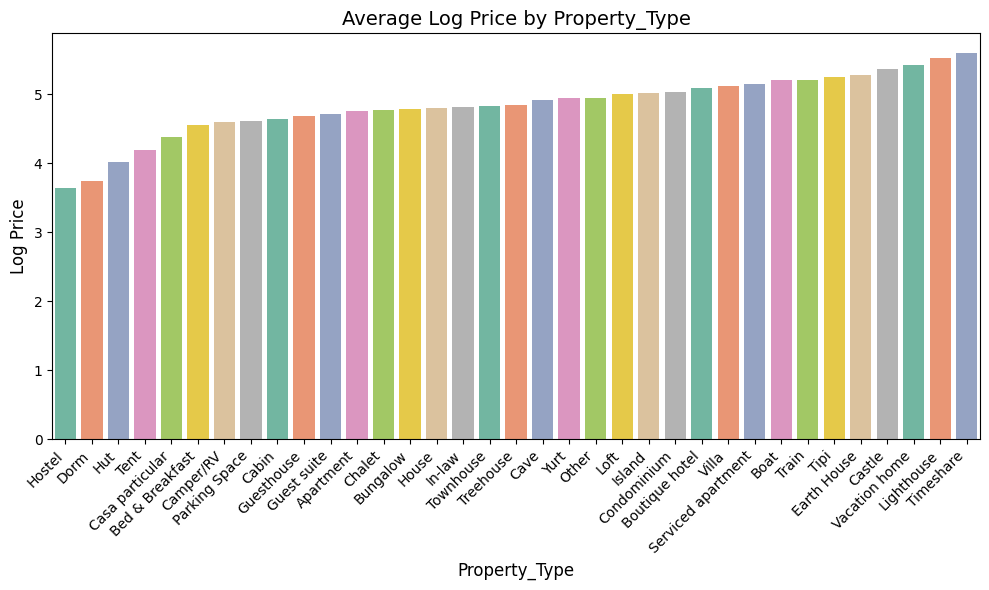

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Analyze the relationship between log_price and categorical variables
categorical_vars = ['room_type', 'property_type']
subset_df = df
for var in categorical_vars:
    # Group data by categorical variable and calculate mean log_price
    grouped_data = subset_df.groupby(var)['log_price'].mean().reset_index()

    # Sort data by log_price
    grouped_data = grouped_data.sort_values('log_price')

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=var, y='log_price', data=grouped_data, palette='Set2')
    plt.xlabel(var.title(), fontsize=12)
    plt.ylabel('Log Price', fontsize=12)
    plt.title(f'Average Log Price by {var.title()}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# 3. Geospatial Analysis:

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np

# Take a random 1/4 subset of the data bcz taking all data crashing m gpu
subset_size = len(df) // 4
subset_indices = np.random.choice(df.index, subset_size, replace=False)
subset_df = df.loc[subset_indices]

# Filter relevant columns
geo_data = subset_df[['latitude', 'longitude', 'log_price', 'neighbourhood']]

# Create a base map centered at the mean of latitudes and longitudes
base_map = folium.Map(location=[geo_data['latitude'].mean(), geo_data['longitude'].mean()], control_scale=True, zoom_start=10)

# Plot each listing as a marker on the map, color-coded by log_price
for index, row in geo_data.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=3,
                        color='blue', fill=True, fill_color='blue').add_to(base_map)

# Add a heat map layer based on log_price
heat_map = HeatMap(data=geo_data[['latitude', 'longitude', 'log_price']], radius=8)
base_map.add_child(heat_map)

# Display the map
base_map



## **Missing data handle**

In [ ]:
# Remove specified columns from the DataFrame not using in this model
columns_to_remove = ['host_has_profile_pic', 'host_identity_verified', 'thumbnail_url']
df_filtered = df.drop(columns=columns_to_remove)

# Display the modified DataFrame
print(df_filtered.head())


         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  [{"Wireless Internet", "Air conditioning", Kit...             3        1.0   
1  [{"Wireless Internet", "Air conditioning", Kit...             7        1.0   
2  [{TV, "Cable TV", "Wireless Internet", "Air co...             5        1.0   
3  [{TV, "Cable TV", Internet, "Wireless Internet...             4        1.0   
4  [{TV, Internet, "Wireless Internet", "Air cond...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...  \
0  Real Bed              strict          True  ...   
1  Real Bed              strict          True  ...   
2  Real 

In [ ]:
# Fill missing values for numerical columns with 0
numerical_columns = ['bathrooms', 'review_scores_rating', 'bedrooms', 'beds', 'Host_Tenure', 'Days_Since_Last_Review']
df[numerical_columns] = df[numerical_columns].fillna(0)

categorical_columns = ['host_response_rate', 'neighbourhood']
df[categorical_columns] = df[categorical_columns].fillna(np.nan)

# Convert 'host_response_rate' to numeric and fill missing values with 0
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.rstrip('%'), errors='coerce')
df['host_response_rate'].fillna(0, inplace=True)


import pandas as pd
from datetime import datetime

# For cleaning_fee, assuming True represents a fee, fill missing values with False
df['cleaning_fee'].fillna(False, inplace=True)

In [ ]:
# Fill NaN values in 'cleaning_fee' column with False (0)
df['cleaning_fee'].fillna(False, inplace=True)

# Convert boolean values to integers (True=1, False=0)
df['cleaning_fee'] = df['cleaning_fee'].astype(int)


# Convert non-numeric values to NaN
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')

# Fill NaN values with 0
df['zipcode'] = df['zipcode'].fillna(0)

# Convert the 'zipcode' column to int
df['zipcode'] = df['zipcode'].astype(int)

In [ ]:
# Check for any remaining missing values
missing_values_after_cleaning = df.isnull().sum()
print(missing_values_after_cleaning)
# print column data types
print(df.dtypes)

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate            0
host_since                    0
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating          0
thumbnail_url              8216
zipcode                       0
bedrooms                      0
beds                          0
Host_Tenure                   0
Amenities_Count               0
Days_Sin

# 4. Sentiment Analysis on Textual Data:

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each description
sentiment_scores = df['description'].apply(lambda x: analyzer.polarity_scores(x))

# Extract compound sentiment score
compound_scores = [score['compound'] for score in sentiment_scores]

# Add sentiment score as a new column in the DataFrame
df['sentiment_score'] = compound_scores

# Classify as positive or negative based on sentiment score threshold
threshold = 0.05
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x >= threshold else 'negative')

# Now, df['sentiment'] contains the predicted sentiment (positive/negative) for each description

# printing sentiment with description

print(df[['description', 'sentiment']])


                                             description sentiment
0      Beautiful, sunlit brownstone 1-bedroom in the ...  positive
1      Enjoy travelling during your stay in Manhattan...  positive
2      The Oasis comes complete with a full backyard ...  positive
3      This light-filled home-away-from-home is super...  positive
4      Cool, cozy, and comfortable studio located in ...  positive
...                                                  ...       ...
74106                           one room in bushwick apt  negative
74107  Located on the Pacific Coast Highway, this apa...  positive
74108  A modern apartment located in East Williamsbur...  positive
74109  Fully renovated, designer's studio located in ...  positive
74110  You will stay-aboard the Island Trader at one ...  positive

[74111 rows x 2 columns]


# 5. Amenities Analysis:

In [ ]:
# Step 1: Parse amenities column to extract individual amenities
amenities = df['amenities']

# Step 2: Create binary variables for each amenity
# Initialize a set to store all unique amenities
unique_amenities = set()

# Iterate over each row in the amenities column and add amenities to the set
for row in amenities:
    unique_amenities.update(row)

# Remove empty strings and whitespace
unique_amenities = {amenity.strip() for amenity in unique_amenities if amenity.strip()}

# Create binary variables for each amenity
for amenity in unique_amenities:
    df[amenity] = amenities.apply(lambda x: 1 if amenity in x else 0)

# Step 3: Calculate correlations
# Exclude non-numeric columns like 'property_type'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlations = df[numeric_columns].corr()['log_price'].sort_values(ascending=False)

# Step 4: Identify amenities most correlated with log_price
top_correlated_amenities = correlations[correlations.abs() > 0.1].drop(['log_price'])

# Display top correlated amenities
print("Top correlated amenities with log_price:")
print(top_correlated_amenities)


<ipython-input-19-43f9f102742f>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = amenities.apply(lambda x: 1 if amenity in x else 0)
<ipython-input-19-43f9f102742f>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = amenities.apply(lambda x: 1 if amenity in x else 0)
<ipython-input-19-43f9f102742f>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

Top correlated amenities with log_price:
accommodates                                     0.567574
bedrooms                                         0.472422
beds                                             0.441791
bathrooms                                        0.354098
"Family/kid friendly"                            0.288098
{TV                                              0.262951
"Cable TV"                                       0.237461
Amenities_Count                                  0.194528
Internet                                         0.194468
"Wireless Internet"                              0.193538
"Indoor fireplace"                               0.170614
Washer                                           0.165601
Dryer                                            0.164315
"Hair dryer"                                     0.116736
Doorman                                          0.116156
"Suitable for events"                            0.114074
Gym                            

In [ ]:
# Select only the top correlated amenities
top_correlated_amenities = correlations[correlations.abs() > 0.1].drop(['log_price'])

# Calculate the score for each row
df['amenities_score'] = df[top_correlated_amenities.index].sum(axis=1)

# Display the DataFrame with the amenities score added
print(df[['log_price', 'amenities_score']].head())


   log_price  amenities_score
0   5.010635             23.0
1   5.129899             39.0
2   4.976734             39.0
3   6.620073             34.0
4   4.744932             22.0


<ipython-input-20-9cfb09b0da22>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['amenities_score'] = df[top_correlated_amenities.index].sum(axis=1)


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00


# **6. Categorical Data Encoding:**

In [ ]:
import pandas as pd

# Select categorical columns for one-hot encoding
categorical_columns = ['room_type', 'city', 'property_type']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the DataFrame with one-hot encoded columns
print(df_encoded.head())

         id  log_price                                          amenities  \
0   6901257   5.010635  [{"Wireless Internet", "Air conditioning", Kit...   
1   6304928   5.129899  [{"Wireless Internet", "Air conditioning", Kit...   
2   7919400   4.976734  [{TV, "Cable TV", "Wireless Internet", "Air co...   
3  13418779   6.620073  [{TV, "Cable TV", Internet, "Wireless Internet...   
4   3808709   4.744932  [{TV, Internet, "Wireless Internet", "Air cond...   

   accommodates  bathrooms  bed_type cancellation_policy  cleaning_fee  \
0             3        1.0  Real Bed              strict             1   
1             7        1.0  Real Bed              strict             1   
2             5        1.0  Real Bed            moderate             1   
3             4        1.0  Real Bed            flexible             1   
4             2        1.0  Real Bed            moderate             1   

                                         description first_review  ...  \
0  Beautiful, sunl

# 7. Model Development and Training,
   # Model Optimization and Validation:

In [ ]:
features = df_encoded[['amenities_score', 'sentiment_score', 'bathrooms', 'bedrooms', 'beds', 'Amenities_Count', 'zipcode', 'cleaning_fee'] +
                  list(df_encoded.columns[df_encoded.columns.str.startswith('room_type_')]) +
                  list(df_encoded.columns[df_encoded.columns.str.startswith('city_')]) +
                  list(df_encoded.columns[df_encoded.columns.str.startswith('property_type_')])]


# **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initializing and fitting the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predictions
y_pred_train = linear_regressor.predict(X_train)
y_pred_test = linear_regressor.predict(X_test)

# Evaluating the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 0.47911677985079293
Test RMSE: 0.47791268481687554


# **GradientBoosting Model**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import ensemble
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=43)
# using hyper parameters
params = {
    "n_estimators": 100,
    "min_samples_split": 5,
    "max_depth": 6,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

import numpy as np
from sklearn.metrics import mean_squared_error,r2_score


rmse = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))

# Print RMSE
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))


The mean squared error (MSE) on test set: 0.2518
The root mean squared error (RMSE) on test set: 0.5018


# **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Creating and fitting the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=23)
model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# prompt: i need code for to find rmse

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

# Print RMSE
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))


Mean Squared Error: 0.18744651157399636
The root mean squared error (RMSE) on test set: 0.4330


# **9. Feature Importance and Model Insights:**

## The best model is Random Forest Regressor

In [ ]:
# Random forest model is used to find Feature Importance and Model Insights
# Get feature importances
importances = model.feature_importances_

# Pair the feature names with their importance scores
feature_importances = [(feature, importance) for feature, importance in zip(features.columns, importances)]

# Sort the feature importances by importance
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")


room_type_Private room: 0.2786387525230436
zipcode: 0.1477767649149015
bedrooms: 0.12992977906474626
sentiment_score: 0.10718761938032144
amenities_score: 0.0702509851425597
bathrooms: 0.06060359546258334
room_type_Shared room: 0.06002648776259529
Amenities_Count: 0.05250550699494644
beds: 0.019170109342668756
city_SF: 0.01583910703999518
cleaning_fee: 0.014821493852109385
property_type_House: 0.009079150299874106
property_type_Condominium: 0.004975499316961445
city_DC: 0.00412803740163641
city_Chicago: 0.0035836022759113675
property_type_Other: 0.003258698688949647
property_type_Loft: 0.0031737052113793977
city_LA: 0.0030824847028155357
property_type_Townhouse: 0.0026856014086311447
city_NYC: 0.0020023009785029335
property_type_Bed & Breakfast: 0.0013404936335033686
property_type_Dorm: 0.0008519388657591758
property_type_Guesthouse: 0.0007829679047872757
property_type_Boutique hotel: 0.0007679973694072165
property_type_Villa: 0.0005949634480423874
property_type_Bungalow: 0.00042859462

# **10. Predictive Performance Assessment:**

In [ ]:
# Random Forest

import numpy as np
from sklearn.metrics import mean_squared_error

# Predicting on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# prompt: i need code for to find rmse


# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

# Print RMSE
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

Mean Squared Error: 0.18744651157399636
The root mean squared error (RMSE) on test set: 0.4330


In [ ]:
#using Random Forest prediction
# PRINT  Y_TEST  ADN Y_PRED

print("y_test:", y_test)
print("y_pred:", y_pred)


y_test: 4079     3.806662
33735    4.941642
69475    4.941642
454      4.867534
25153    3.663562
           ...   
67535    5.220356
23680    4.499810
18399    3.688879
70880    6.887553
39863    5.298317
Name: log_price, Length: 22234, dtype: float64
y_pred: [3.85888908 5.15630512 5.12441752 ... 3.88574662 6.02154388 5.1586424 ]


In [ ]:

y_test_minus_y_pred = y_test - y_pred
print("Difference between y_test and y_pred:")
print(y_test_minus_y_pred)


Difference between y_test and y_pred:
4079    -0.052227
33735   -0.214663
69475   -0.182775
454     -0.579515
25153    0.015987
           ...   
67535    0.309215
23680   -0.101954
18399   -0.196867
70880    0.866009
39863    0.139675
Name: log_price, Length: 22234, dtype: float64
